In [3]:
pip install svgwrite



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import random
def random_numbers(n):
    return [random.random() for _ in range(n)]

random_numbers(10)

[0.13803626869845087,
 0.6783834362723911,
 0.7965096024733063,
 0.8610306073877342,
 0.9712651376799548,
 0.6035077462174459,
 0.45703094489690077,
 0.21011154887813288,
 0.5360797514247773,
 0.9802218489150745]

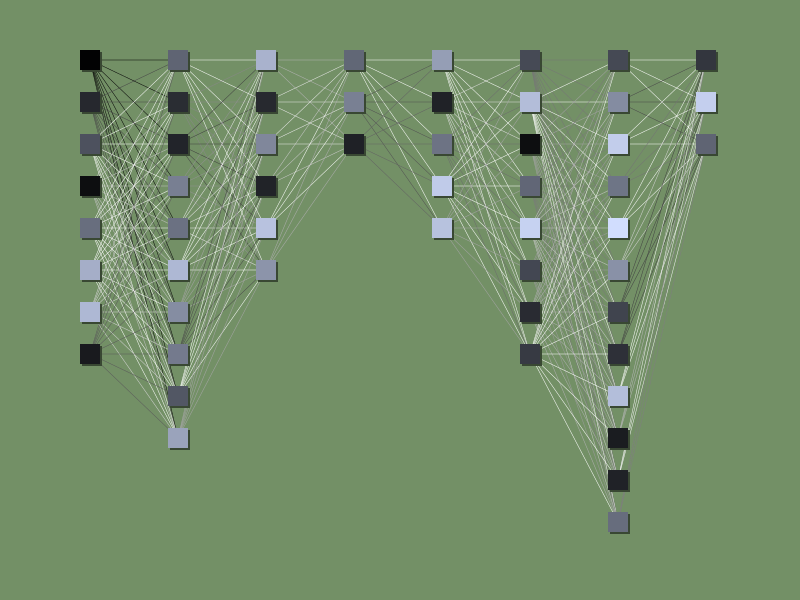

In [531]:
from typing import TypedDict

import svgwrite
from svgwrite.utils import rgb

from IPython.display import SVG, display

class Layer(TypedDict):
    size: int
    weights: list[float]
    biases: list[float]

dwg = svgwrite.Drawing('example.svg', size=(800, 600))

layer_sizes = [8, 10, 6, 3, 5, 8, 12, 3]
inputs = random_numbers(len(layer_sizes))

layers: list[Layer] = [{
    'size': size,
    'weights': random_numbers(size),
    'biases': random_numbers(size),
} for size in layer_sizes]

neuron_size = (20, 20)

def neuron_color(value: float) -> str:
    return rgb(value * 210, value * 222, value * 255)

def relu(x: float, bias: float, weight: float) -> float:
    return max(bias + weight * x, 0)

def connection_color(value: float) -> str:
    value = min(value, 1)
    return rgb(value * 255, value * 255, value * 255)

def draw_neuron(x: float, y: str, color: str):
    dwg.add(dwg.rect((x+2, y+2), neuron_size, fill=rgb(128*0.9*0.5, 160*0.9*0.5, 128*0.8*0.5)))
    dwg.add(dwg.rect((x, y), neuron_size, fill=color))

def draw_connection(
    p1: tuple[float, float],
    p2: tuple[float, float],
    color: str,
):
    dwg.add(dwg.line(p1, p2, stroke=color, stroke_width=0.5))

def draw_background(color: str):
    dwg.add(dwg.rect(insert=(0, 0), size=('100%', '100%'), fill=color))

min_x = 80
min_y = 50
neuron_distance = 42
layer_distance = 88

def neuron_x(layer_i): return min_x + layer_i * layer_distance
def neuron_y(neuron_i): return min_y + neuron_i * neuron_distance

draw_background(color=rgb(128*0.9, 160*0.9, 128*0.8))

for (layer_i, layer) in enumerate(layers):
    for (neuron_i, weight) in enumerate(layer['weights']):
        if layer_i < len(layers) - 1:
            next_layer_size: int = layer_sizes[layer_i + 1]
            for j in range(next_layer_size):
                off_x = neuron_size[0] / 2
                off_y = neuron_size[1] / 2
                x_0 = neuron_x(layer_i) + off_x
                y_0 = neuron_y(neuron_i) + off_y
                x_1 = neuron_x(layer_i+1) + off_x
                y_1 = neuron_y(j) + off_y
                
                def input_of(layer_i: int, neuron_i: int) -> float:
                    # XXX Does not take into account all inputs
                    return inputs[neuron_i % len(inputs)]

                draw_connection(
                    p1=(x_0, y_0),
                    p2=(x_1, y_1),
                    color=connection_color(
                        value=relu(
                            x=input_of(layer_i, neuron_i),
                            bias=layer['biases'][neuron_i],
                            weight=weight,
                        )
                    ),
                )

for (layer_i, layer) in enumerate(layers):
    for (neuron_i, weight) in enumerate(layer['weights']):
        draw_neuron(
            x=neuron_x(layer_i),
            y=neuron_y(neuron_i),
            color=neuron_color(weight)
        )

display(SVG(dwg.tostring()))

In [6]:
[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]